In [1]:
import pandas as pd

mat = pd.read_csv("output_files/confusion_matrix.csv", header=None)

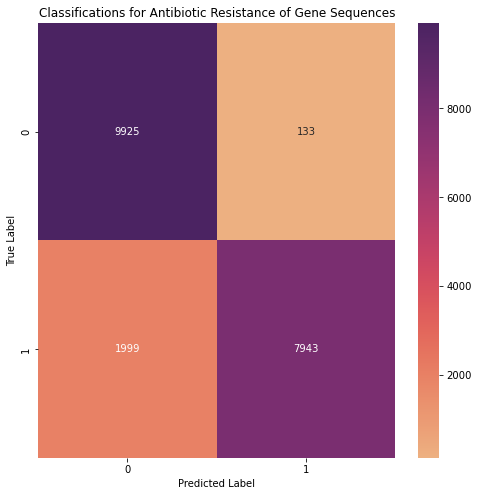

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,8))
plt.title("Classifications for Antibiotic Resistance of Gene Sequences")
sns.heatmap(mat, annot=True, cmap="flare", fmt="d")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.savefig("visualizations/confusion_matrix.png")

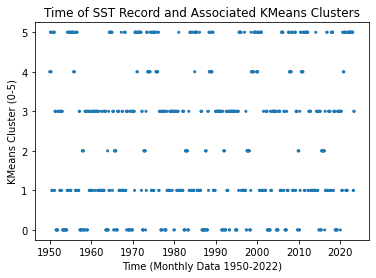

In [7]:
df_cluster = pd.read_csv("output_files/kmeans_assignments.csv", header=None)
df_cluster.columns = ['Year', 'Cluster']
df_cluster['Year'] = 1950 + df_cluster['Year']/12
plt.scatter(df_cluster['Year'], df_cluster['Cluster'], sizes=len(df_cluster['Year'])*[4])
plt.title("Time of SST Record and Associated KMeans Clusters")
plt.xlabel("Time (Monthly Data 1950-2022)")
plt.ylabel("KMeans Cluster (0-5)")
plt.savefig("visualizations/kmeans_graph.png")

In [10]:
valley_list = list(df2[df2['Cluster']==4.0].Year.astype(int).unique())
print(valley_list)

[1950, 1955, 1971, 1973, 1974, 1975, 1976, 1984, 1988, 1989, 1998, 1999, 2000, 2007, 2008, 2010, 2011, 2020]


In [11]:
peak_list = list(df2[df2['Cluster']==2.0].Year.astype(int).unique())
print(peak_list)

[1957, 1958, 1963, 1965, 1972, 1973, 1982, 1983, 1987, 1991, 1992, 1997, 1998, 2009, 2010, 2015, 2016]


In [13]:
df_scores = pd.read_csv("output_files/output_scores.csv")
df_scores_copy = df_scores.copy()
df_scores_copy['Sequence1'], df_scores_copy['Sequence2'] = df_scores_copy['Sequence2'].copy(), df_scores_copy['Sequence1'].copy()
final_df = pd.concat([df_scores, df_scores_copy], axis=0, ignore_index=True)

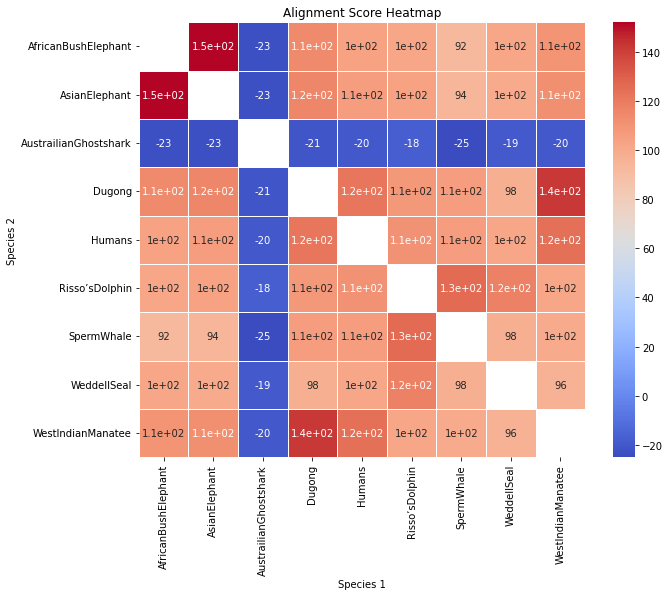

In [14]:
heatmap_data = final_df.pivot('Sequence1', 'Sequence2', 'AlignmentScore')
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Alignment Score Heatmap')
plt.xlabel('Species 1')
plt.ylabel('Species 2')
plt.savefig('visualizations/sequence_heatmap.png')